In [95]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
restaurants_df = pd.read_csv('restaurants_data', sep='\t')

In [97]:
restaurants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49403 entries, 0 to 49402
Data columns (total 8 columns):
Unnamed: 0       49403 non-null int64
business_id      49403 non-null object
review_count     49403 non-null float64
stars            49403 non-null float64
checkin_count    49403 non-null float64
city             49403 non-null int64
state            49403 non-null int64
categories       49403 non-null object
dtypes: float64(3), int64(3), object(2)
memory usage: 3.0+ MB


<Figure size 432x288 with 0 Axes>

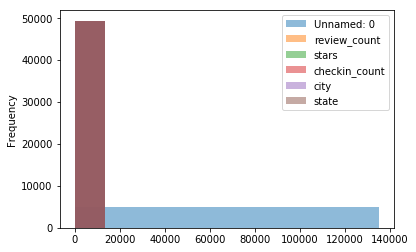

In [98]:
plt.figure();

restaurants_df.plot.hist(alpha=0.5)

plt.show()

In [99]:
restaurants_df["stars"].value_counts()

4.0    30560
3.0     9055
2.0     8331
5.0     1186
1.0      271
Name: stars, dtype: int64

In [100]:
restaurants_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [101]:
X = restaurants_df[['review_count', 'checkin_count', 'city', 'state']]
y = restaurants_df[['stars']]

X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49403 entries, 0 to 49402
Data columns (total 4 columns):
review_count     49403 non-null float64
checkin_count    49403 non-null float64
city             49403 non-null int64
state            49403 non-null int64
dtypes: float64(2), int64(2)
memory usage: 1.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49403 entries, 0 to 49402
Data columns (total 1 columns):
stars    49403 non-null float64
dtypes: float64(1)
memory usage: 386.0 KB


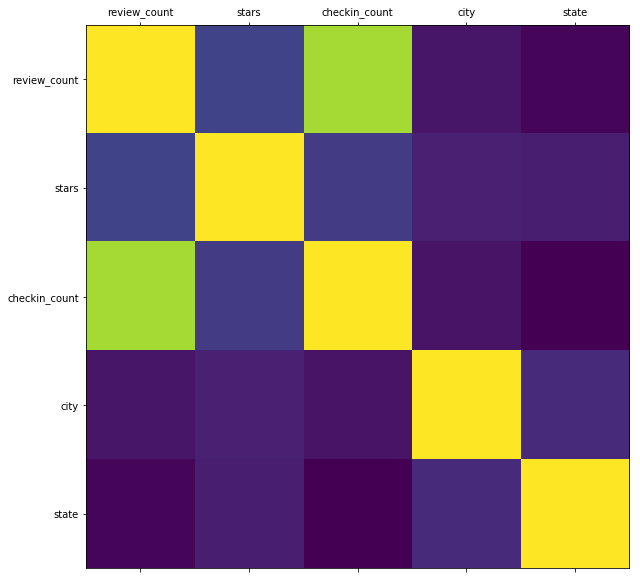

In [102]:
corr = restaurants_df.corr()

fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000205EDDF8710>,
      dtype=object)

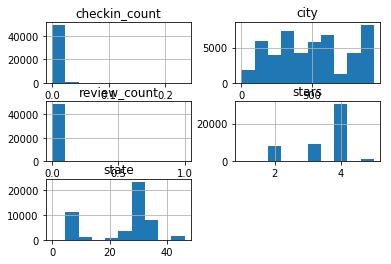

In [103]:
restaurants_df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000205D40D0E10>,
      dtype=object)

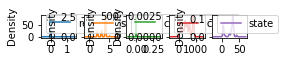

In [104]:
restaurants_df.plot(kind='density', subplots=True, layout=(8,8), sharex=False)

review_count       AxesSubplot(0.125,0.799681;0.0824468x0.0803191)
stars            AxesSubplot(0.223936,0.799681;0.0824468x0.0803...
checkin_count    AxesSubplot(0.322872,0.799681;0.0824468x0.0803...
city             AxesSubplot(0.421809,0.799681;0.0824468x0.0803...
state            AxesSubplot(0.520745,0.799681;0.0824468x0.0803...
dtype: object

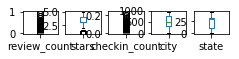

In [105]:
restaurants_df.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False)

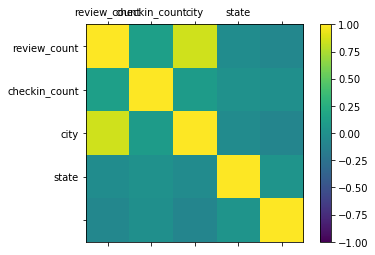

In [106]:
correlations = restaurants_df.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(X)
ax.set_yticklabels(X)
plt.show()

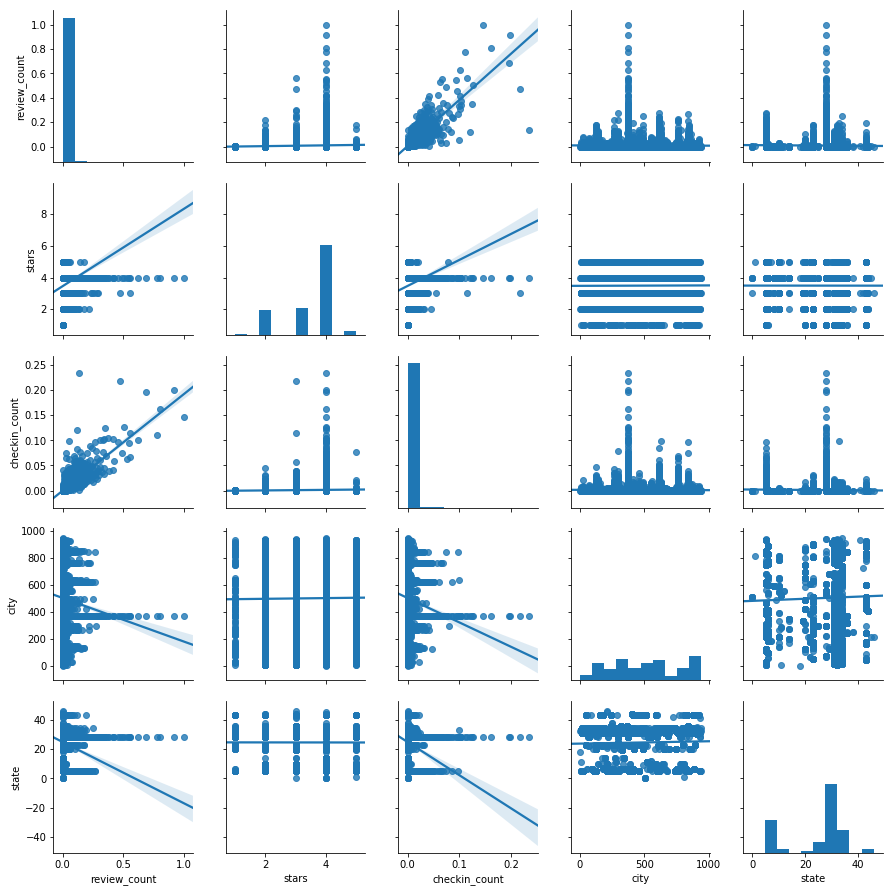

In [107]:
f = sns.pairplot(restaurants_df,palette="husl",kind="reg")
f

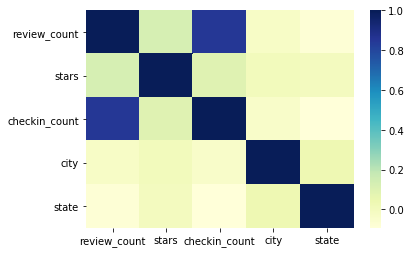

In [108]:
import seaborn as sns
corr = restaurants_df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap="YlGnBu")
plt.show()

In [109]:
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
    

In [110]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [112]:
def decisionTreeClassifier(md=None,pr=None):
    if(md!=None and pr==None):
        model = tree.DecisionTreeClassifier(max_depth=md)
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        print("\tAccuracy: ",accuracy_score(y_test, y_predict)*100)
        print("\tPrecision: ",precision_score(y_test, y_predict, average='weighted'))
        print("\tRecall: ",recall_score(y_test, y_predict, average='weighted'))
        cm = confusion_matrix(y_test, y_predict)
        print("\t\tConfusion Matrix: ",cm)
    elif(md!=None and pr!=None):
        model = tree.DecisionTreeClassifier(max_depth=md)
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        print("\tAccuracy: ",accuracy_score(y_test, y_predict)*100)
        print("\tPrecision: ",precision_score(y_test, y_predict, average='weighted'))
        print("\tRecall: ",recall_score(y_test, y_predict, average='weighted'))
        cm = confusion_matrix(y_test, y_predict)
        print("\t\tConfusion Matrix: ",cm)
    else:
        model = tree.DecisionTreeClassifier()
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        print("\tAccuracy: ",accuracy_score(y_test, y_predict)*100)
        print("\tPrecision: ",precision_score(y_test, y_predict, average='weighted'))
        print("\tRecall: ",recall_score(y_test, y_predict, average='weighted'))
        cm = confusion_matrix(y_test, y_predict)
        print("\t\tConfusion Matrix: ",cm)
        
    

In [19]:
decisionTreeClassifier()

	Accuracy:  48.077078779046225
	Precision:  0.4816631084031521
	Recall:  0.4807707877904623
		Confusion Matrix:  [[   3   21   12   33    3]
 [  22  547  420 1067   44]
 [  15  445  480 1326   33]
 [  29 1212 1319 4898  114]
 [   3   65   57  173   10]]


In [20]:
decisionTreeClassifier(md=5,pr=None)

	Accuracy:  61.43632094567242
	Precision:  0.45161352326628873
	Recall:  0.6143632094567242
		Confusion Matrix:  [[   0    6    0   66    0]
 [   0  107    0 1993    0]
 [   0   47    0 2252    0]
 [   0   88    3 7481    0]
 [   0    3    0  305    0]]


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
decisionTreeClassifier(md=5, pr='true')

	Accuracy:  61.43632094567242


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


	Precision:  0.45161352326628873
	Recall:  0.6143632094567242
		Confusion Matrix:  [[   0    6    0   66    0]
 [   0  107    0 1993    0]
 [   0   47    0 2252    0]
 [   0   88    3 7481    0]
 [   0    3    0  305    0]]


In [22]:
decisionTreeClassifier(md=10, pr='true')

	Accuracy:  60.48902922840256
	Precision:  0.49015438173869114
	Recall:  0.6048902922840256
		Confusion Matrix:  [[   0   12    1   59    0]
 [   0  183   73 1843    1]
 [   0   97   76 2126    0]
 [   0  207  152 7212    1]
 [   0   15    5  288    0]]


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
decisionTreeClassifier(md=15, pr='true')

	Accuracy:  56.311229859930364
	Precision:  0.4796651564201718
	Recall:  0.5631122985993037
		Confusion Matrix:  [[   0   17    5   50    0]
 [   5  346  192 1545   12]
 [   1  227  205 1855   11]
 [  11  576  547 6396   42]
 [   0   40   21  239    8]]


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


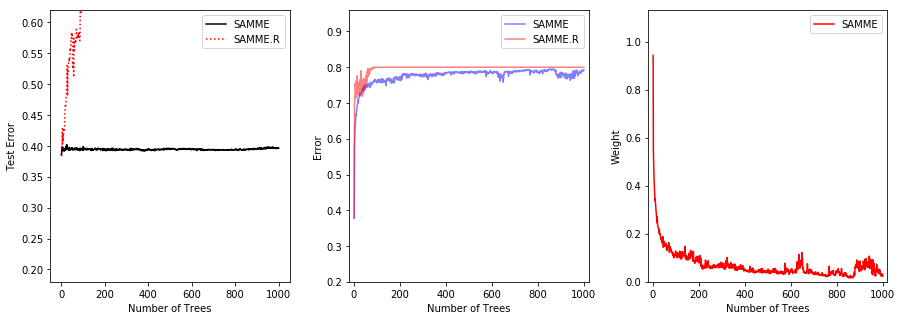

In [24]:

bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5),
    n_estimators=1000,
    learning_rate=1)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5),
    n_estimators=1000,
    learning_rate=0.5,
    algorithm="SAMME")

bdt_real.fit(X_train, y_train)
bdt_discrete.fit(X_train, y_train)

real_test_errors = []
discrete_test_errors = []

for real_test_predict, discrete_train_predict in zip(
        bdt_real.staged_predict(X_test), bdt_discrete.staged_predict(X_test)):
    real_test_errors.append(
        1. - accuracy_score(real_test_predict, y_test))
    discrete_test_errors.append(
        1. - accuracy_score(discrete_train_predict, y_test))

n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1),discrete_test_errors, c='black', label='SAMME')
plt.plot(range(1, n_trees_real + 1),real_test_errors, c='red',linestyle='dotted', label='SAMME.R')
plt.legend()
plt.ylim(0.18, 0.62)
plt.ylabel('Test Error')
plt.xlabel('Number of Trees')

plt.subplot(132)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,"b", label='SAMME', alpha=.5)
plt.plot(range(1, n_trees_real + 1), real_estimator_errors,"r", label='SAMME.R', alpha=.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,max(real_estimator_errors.max(),discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(133)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights,"r", label='SAMME')
plt.legend()
plt.ylabel('Weight')
plt.xlabel('Number of Trees')
plt.ylim((0, discrete_estimator_weights.max() * 1.2))
plt.xlim((-20, n_trees_discrete + 20))

# prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.25)
plt.show()

In [114]:
from sklearn import svm
def supportVectorMachine():
    clf = svm.SVC()
    clf.fit(X, y)
    y_predict = clf.predict(X_test)
    svm1 = accuracy_score(y_test, y_predict)
    print("Accuracy: ",accuracy_score(y_test, y_predict)*100)
    print("Precision: ",precision_score(y_test, y_predict, average='weighted'))
    print("Recall: ", recall_score(y_test, y_predict, average='weighted'))
    print("\tSupport Vectors: ", clf.support_vectors_)
    
def supportVectorMachine2():
    clf = svm.SVC(decision_function_shape='ovo')
    clf.fit(X, y)
    y_predict = clf.predict(X_test)
    svm1 = accuracy_score(y_test, y_predict)
    print("Accuracy: ",accuracy_score(y_test, y_predict)*100)
    print("Precision: ",precision_score(y_test, y_predict, average='weighted'))
    print("Recall: ",recall_score(y_test, y_predict, average='weighted'))
    print("\tSupport Vector: ",clf.support_vectors_)
    

In [26]:
supportVectorMachine()

C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  61.31487328961218
Precision:  0.5620212954613323
Recall:  0.6131487328961218
	Support Vectors:  [[-0.36721421 -0.26532219 -1.45891492 -0.12712737]
 [-0.37401513 -0.29033975 -0.16773078  0.56471666]
 [-0.37401513 -0.28700408 -0.08531477  0.65119716]
 ...
 [-0.36721421 -0.26699003  0.52299386  0.73767767]
 [-0.38081605 -0.29367543 -0.50131939  0.30527515]
 [-0.3604133  -0.28867192 -0.07746563  1.60248271]]


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [115]:
supportVectorMachine2()

C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  61.31487328961218
Precision:  0.5620212954613323
Recall:  0.6131487328961218
	Support Vector:  [[-0.36721421 -0.26532219 -1.45891492 -0.12712737]
 [-0.37401513 -0.29033975 -0.16773078  0.56471666]
 [-0.37401513 -0.28700408 -0.08531477  0.65119716]
 ...
 [-0.36721421 -0.26699003  0.52299386  0.73767767]
 [-0.38081605 -0.29367543 -0.50131939  0.30527515]
 [-0.3604133  -0.28867192 -0.07746563  1.60248271]]


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

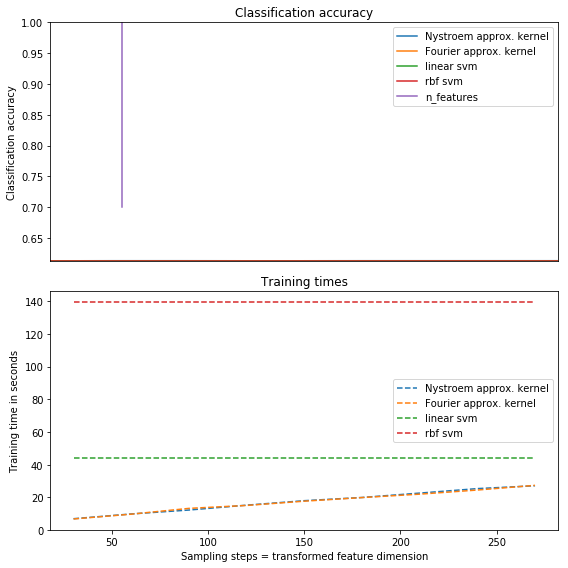

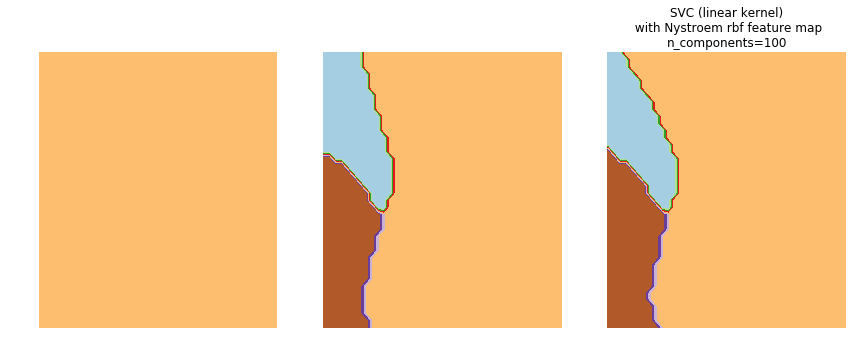

In [28]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np
from time import time

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, pipeline
from sklearn.kernel_approximation import (RBFSampler,
                                          Nystroem)
from sklearn.decomposition import PCA

n_samples = 35000
data = X / 8.
data -= data.mean(axis=0)

# We learn the digits on the first half of the digits
data_train, targets_train = (X_train, y_train)


# Now predict the value of the digit on the second half:
data_test, targets_test = (X_test, y_test)

# Create a classifier: a support vector classifier
kernel_svm = svm.SVC(gamma=.2)
linear_svm = svm.LinearSVC()

# create pipeline from kernel approximation
# and linear svm
feature_map_fourier = RBFSampler(gamma=.2, random_state=1)
feature_map_nystroem = Nystroem(gamma=.2, random_state=1)
fourier_approx_svm = pipeline.Pipeline([("feature_map", feature_map_fourier),
                                        ("svm", svm.LinearSVC())])

nystroem_approx_svm = pipeline.Pipeline([("feature_map", feature_map_nystroem),
                                        ("svm", svm.LinearSVC())])

# fit and predict using linear and kernel svm:

kernel_svm_time = time()
kernel_svm.fit(data_train, targets_train)
kernel_svm_score = kernel_svm.score(data_test, targets_test)
kernel_svm_time = time() - kernel_svm_time

linear_svm_time = time()
linear_svm.fit(data_train, targets_train)
linear_svm_score = linear_svm.score(data_test, targets_test)
linear_svm_time = time() - linear_svm_time

sample_sizes = 30 * np.arange(1, 10)
fourier_scores = []
nystroem_scores = []
fourier_times = []
nystroem_times = []

for D in sample_sizes:
    fourier_approx_svm.set_params(feature_map__n_components=D)
    nystroem_approx_svm.set_params(feature_map__n_components=D)
    start = time()
    nystroem_approx_svm.fit(data_train, targets_train)
    nystroem_times.append(time() - start)

    start = time()
    fourier_approx_svm.fit(data_train, targets_train)
    fourier_times.append(time() - start)

    fourier_score = fourier_approx_svm.score(data_test, targets_test)
    nystroem_score = nystroem_approx_svm.score(data_test, targets_test)
    nystroem_scores.append(nystroem_score)
    fourier_scores.append(fourier_score)

# plot the results:
plt.figure(figsize=(8, 8))
accuracy = plt.subplot(211)
# second y axis for timeings
timescale = plt.subplot(212)

accuracy.plot(sample_sizes, nystroem_scores, label="Nystroem approx. kernel")
timescale.plot(sample_sizes, nystroem_times, '--',
               label='Nystroem approx. kernel')

accuracy.plot(sample_sizes, fourier_scores, label="Fourier approx. kernel")
timescale.plot(sample_sizes, fourier_times, '--',
               label='Fourier approx. kernel')

# horizontal lines for exact rbf and linear kernels:
accuracy.plot([sample_sizes[0], sample_sizes[-1]],
              [linear_svm_score, linear_svm_score], label="linear svm")
timescale.plot([sample_sizes[0], sample_sizes[-1]],
               [linear_svm_time, linear_svm_time], '--', label='linear svm')

accuracy.plot([sample_sizes[0], sample_sizes[-1]],
              [kernel_svm_score, kernel_svm_score], label="rbf svm")
timescale.plot([sample_sizes[0], sample_sizes[-1]],
               [kernel_svm_time, kernel_svm_time], '--', label='rbf svm')

# vertical line for dataset dimensionality = 64
accuracy.plot([64, 64], [0.7, 1], label="n_features")

# legends and labels
accuracy.set_title("Classification accuracy")
timescale.set_title("Training times")
accuracy.set_xlim(sample_sizes[0], sample_sizes[-1])
accuracy.set_xticks(())
accuracy.set_ylim(np.min(fourier_scores), 1)
timescale.set_xlabel("Sampling steps = transformed feature dimension")
accuracy.set_ylabel("Classification accuracy")
timescale.set_ylabel("Training time in seconds")
accuracy.legend(loc='best')
timescale.legend(loc='best')

# visualize the decision surface, projected down to the first
# two principal components of the dataset
pca = PCA(n_components=4).fit(data_train)

X = pca.transform(data_train)

# Generate grid along first two principal components
multiples = np.arange(-2, 2, 0.1)
# steps along first component
first = multiples[:, np.newaxis] * pca.components_[0, :]
# steps along second component
second = multiples[:, np.newaxis] * pca.components_[1, :]
# combine
grid = first[np.newaxis, :, :] + second[:, np.newaxis, :]
flat_grid = grid.reshape(-1, data.shape[1])

# title for the plots
titles = ['SVC with rbf kernel',
          'SVC (linear kernel)\n with Fourier rbf feature map\n'
          'n_components=100',
          'SVC (linear kernel)\n with Nystroem rbf feature map\n'
          'n_components=100']

plt.tight_layout()
plt.figure(figsize=(12, 5))

# predict and plot
for i, clf in enumerate((kernel_svm, nystroem_approx_svm,
                         fourier_approx_svm)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(1, 3, i + 1)
    Z = clf.predict(flat_grid)

    # Put the result into a color plot
    Z = Z.reshape(grid.shape[:-1])
    plt.contourf(multiples, multiples, Z, cmap=plt.cm.Paired)
    plt.axis('off')

plt.title(titles[i])
plt.tight_layout()
plt.show()

In [116]:
X = restaurants_df[['review_count', 'checkin_count', 'city', 'state']]
y = restaurants_df[['stars']]
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [30]:
print("Linear SVC")
lin_clf = svm.LinearSVC()
lin_clf.fit(X, y)

y_predict = lin_clf.predict(X_test)

print("\tAccuracy: ",accuracy_score(y_test, y_predict)*100)
print("\tPrecision: ",precision_score(y_test, y_predict, average='weighted'))
print("\tRecall: ",recall_score(y_test, y_predict, average='weighted'))


from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_clf, X_train, y_train, cv=10)
print("\t\tCross Validation Score: ",scores) 

Linear SVC


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	Accuracy:  61.29868026880414
	Precision:  0.3758328801582065
	Recall:  0.6129868026880414


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

		Cross Validation Score:  [0.62017804 0.62007555 0.62034539 0.62007555 0.62034539 0.62007555
 0.62051282 0.62024291 0.62057791 0.62074554]


In [117]:
def SVMWIthKernel(kernel,c=None):
    if(c==None):
        clf = svm.SVC(kernel=kernel)
        clf.fit(X, y)
        y_predict = clf.predict(X_test)
        print("Accuracy: ",accuracy_score(y_test, y_predict)*100)
        print("Precision: ",precision_score(y_test, y_predict, average='weighted'))
        print("Recall: ",recall_score(y_test, y_predict, average='weighted'))
    else:
        clf = svm.SVC(kernel=kernel, C=c)
        clf.fit(X, y)
        y_predict = clf.predict(X_test)
        print("Accuracy: ",accuracy_score(y_test, y_predict)*100)
        print("Precision: ",precision_score(y_test, y_predict, average='weighted'))
        print("Recall: ",recall_score(y_test, y_predict, average='weighted'))
        

In [32]:
SVMWIthKernel(kernel='rbf',c=None)

C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  61.31487328961218
Precision:  0.5620212954613323
Recall:  0.6131487328961218


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
SVMWIthKernel(kernel='linear',c=0.025)

C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  61.306776779208164
Precision:  0.3758520879055657
Recall:  0.6130677677920816


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [118]:
def SVC2(g,c):
    clf = svm.SVC(gamma=g, C=c)
    clf.fit(X, y)
    y_predict = clf.predict(X_test)
    print("Accuracy: ",accuracy_score(y_test, y_predict)*100)
    print("Precision: ",precision_score(y_test, y_predict, average='weighted'))
    print("Recall: ",recall_score(y_test, y_predict, average='weighted'))

In [35]:
SVC2(2,1)

C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  61.33916282082422
Precision:  0.5870498771860947
Recall:  0.6133916282082422


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
SVC2(2,0.5)

C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  61.306776779208164
Precision:  0.3758520879055657
Recall:  0.6130677677920816


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
SVC2(2,0.25)

C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  61.306776779208164
Precision:  0.3758520879055657
Recall:  0.6130677677920816


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
SVC2(0.2,1)

C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  61.31487328961218
Precision:  0.5620212954613323
Recall:  0.6131487328961218


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [39]:
SVC2(10,1)

C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  61.5334790705206
Precision:  0.6763519655927318
Recall:  0.615334790705206


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [40]:
SVC2(50,1)

C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  62.351226621326205
Precision:  0.6485757422559737
Recall:  0.6235122662132621


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
SVC2(100,1)

C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  63.120395109707715
Precision:  0.6565932588167082
Recall:  0.6312039510970772


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
SVC2(500,1)

C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  65.60602380374058
Precision:  0.684710350188276
Recall:  0.6560602380374059


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
SVC2(1000,1)

C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  67.38725609262409
Precision:  0.7096173494382182
Recall:  0.6738725609262408


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:
SVC2(1500,1)

C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  68.71508379888269
Precision:  0.7266561162986016
Recall:  0.6871508379888268


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [45]:
SVC2(2000,1)

C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  69.57331390170836
Precision:  0.7356329811142989
Recall:  0.6957331390170837


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [119]:
from sklearn.ensemble import RandomForestClassifier
def randomForest(n_est,md,rs):
    random_forest = RandomForestClassifier(n_estimators=n_est, max_depth=md, random_state=rs)
    random_forest.fit(X_train, y_train)
    y_predict = random_forest.predict(X_test)
    print("Accuracy: ",accuracy_score(y_test, y_predict)*100)
    print("Precision: ",precision_score(y_test, y_predict, average=None))
    print("Recall: ",recall_score(y_test, y_predict, average=None))
    

In [47]:
randomForest(30,10,1)

C:\Users\mathu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy:  61.49299651850053
Precision:  [0.         0.425      0.13333333 0.62119823 0.        ]
Recall:  [0.         0.0647619  0.00173989 0.98454834 0.        ]


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
randomForest(40,5,1)

C:\Users\mathu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy:  61.306776779208164
Precision:  [0.         0.         0.         0.61306777 0.        ]
Recall:  [0. 0. 0. 1. 0.]


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [49]:
randomForest(60,8,1)

C:\Users\mathu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy:  61.6306371953688
Precision:  [0.        0.4952381 0.        0.6184514 0.       ]
Recall:  [0.         0.04952381 0.         0.99154781 0.        ]


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [120]:
from sklearn.linear_model import LogisticRegressionCV
def logRegression(mi=None):
    if(mi==None):
        lr = LogisticRegressionCV()
        lr.fit(X_train, y_train)
        y_predict = lr.predict(X_test)
        print("Accuracy: ",accuracy_score(y_test, y_predict)*100)
        print("Precision: ",precision_score(y_test, y_predict, average='weighted'))
        print("Recall: ",recall_score(y_test, y_predict, average='weighted'))
    else:
        lr = LogisticRegressionCV(max_iter=mi)
        lr.fit(X_train, y_train)
        y_predict = lr.predict(X_test)
        print("Accuracy: ",accuracy_score(y_test, y_predict)*100)
        print("Precision: ",precision_score(y_test, y_predict, average='weighted'))
        print("Recall: ",recall_score(y_test, y_predict, average='weighted'))
        
    

In [51]:
logRegression(mi=None)

C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  61.306776779208164
Precision:  0.3758520879055657
Recall:  0.6130677677920816


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [52]:
logRegression(mi=100)

C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  61.306776779208164
Precision:  0.3758520879055657
Recall:  0.6130677677920816


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
logRegression(mi=200)

C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  61.306776779208164
Precision:  0.3758520879055657
Recall:  0.6130677677920816


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [54]:
logRegression(mi=500)

C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  61.306776779208164
Precision:  0.3758520879055657
Recall:  0.6130677677920816


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [121]:
from sklearn.neighbors import KNeighborsClassifier
def KNeighborClassifier(n):
    print("k: ", n)
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(X_train, y_train)
    y_predict = neigh.predict(X_test)
    print("\tAccuracy: ",accuracy_score(y_test, y_predict)*100)
    print("\tPrecision: ",precision_score(y_test, y_predict, average='weighted'))
    print("\tRecall: ",recall_score(y_test, y_predict, average='weighted'))
    

In [122]:
for i in range(3,21,2):
    KNeighborClassifier(i)
    

k:  3


C:\Users\mathu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


	Accuracy:  51.113270180552185
	Precision:  0.4898491804657014
	Recall:  0.5111327018055218
k:  5


C:\Users\mathu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


	Accuracy:  53.971338353169784
	Precision:  0.4981194854411442
	Recall:  0.5397133835316978
k:  7


C:\Users\mathu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


	Accuracy:  56.303133349526355
	Precision:  0.500532405008874
	Recall:  0.5630313334952636
k:  9


C:\Users\mathu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


	Accuracy:  57.64715407659299
	Precision:  0.5027807513665062
	Recall:  0.5764715407659299
k:  11


C:\Users\mathu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


	Accuracy:  58.23819933608615
	Precision:  0.5007672005282838
	Recall:  0.5823819933608615
k:  13


C:\Users\mathu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


	Accuracy:  59.20978058456805
	Precision:  0.5050208584503828
	Recall:  0.5920978058456805
k:  15


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mathu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


	Accuracy:  59.3879038134564
	Precision:  0.4976553914135302
	Recall:  0.593879038134564
k:  17


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mathu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


	Accuracy:  59.72795725042507
	Precision:  0.4960029424716475
	Recall:  0.5972795725042507
k:  19


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mathu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


	Accuracy:  60.04372115618168
	Precision:  0.49539695419525115
	Recall:  0.6004372115618168


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

def naiveBayes():
    print("Gaussian Naive Bayes")
    nb = GaussianNB()
    nb.fit(X_train, y_train)

    y_predict = nb.predict(X_test)
    print("\tAccuracy: ",accuracy_score(y_test, y_predict)*100)
    print("\tPrecision: ",precision_score(y_test, y_predict, average='weighted'))
    print("\tRecall: ",recall_score(y_test, y_predict, average='weighted'))
    
    print("Bernoulli Naive Bayes")
    nb = BernoulliNB()
    nb.fit(X_train, y_train)
    y_predict = nb.predict(X_test)
    print("\tAccuracy: ",accuracy_score(y_test, y_predict)*100)
    print("\tPrecision: ",precision_score(y_test, y_predict, average='weighted'))
    print("\tRecall: ",recall_score(y_test, y_predict, average='weighted'))


In [59]:
naiveBayes()

Gaussian Naive Bayes
	Accuracy:  21.593393247510324
	Precision:  0.5555226325703698
	Recall:  0.21593393247510323
Bernoulli Naive Bayes
	Accuracy:  61.306776779208164
	Precision:  0.3758520879055657
	Recall:  0.6130677677920816


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_f

In [64]:

from sklearn.neural_network import MLPClassifier
def NeuralNetwork(hl,activationFunc):
    neural = MLPClassifier(hidden_layer_sizes=hl, activation=activationFunc, alpha=0.001, learning_rate='adaptive')
    neural.fit(X_train, y_train)
    y_predict = neural.predict(X_test)
    print("\tAccuracy: ",accuracy_score(y_test, y_predict)*100)
    print("\tPrecision: ",precision_score(y_test, y_predict, average='weighted'))
    print("\tRecall: ",recall_score(y_test, y_predict, average='weighted'))

In [65]:
hl = (100, 100,100)
act = 'logistic'
NeuralNetwork(hl,act)

C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	Accuracy:  61.306776779208164
	Precision:  0.3758520879055657
	Recall:  0.6130677677920816


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [66]:
hl = (80, 160)
act = 'tanh'
NeuralNetwork(hl,act)

C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	Accuracy:  61.573961622540686
	Precision:  0.6406262219636857
	Recall:  0.6157396162254068


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [67]:
hl = (50, 100,150,200)
act = 'relu'
NeuralNetwork(hl,act)

C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	Accuracy:  61.49299651850053
	Precision:  0.4579915631090312
	Recall:  0.6149299651850053


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
